### Tsne (Credit card fraud detection)

#### Information about Credit Card Fraud Detection:

- The datasets contains transactions made by credit cards in September 2013 by european cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
- It contains only numerical input variables which are the result of a PCA transformation.
- Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

 #### Features Information:

- (i). Amount: is the transaction Amount
- (ii). Time : contains the seconds elapsed between each transaction and the first transaction in the dataset.
- (iii).V1,V2,....V28: are the principal components obtained with PCA.
- (IV). Class: fraud =1,otherwise =0

**Link:** https://www.kaggle.com/mlg-ulb/creditcardfraud

**Task 1:**  Visualize  the T-sne plot of the credit card fraud detection data 

In [12]:
# import the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [13]:
# load the Credit Card Fraud Detection dataset
# recap the the dataset

credit = pd.read_csv('creditcard.csv')
credit.head() # show the 5 datapoints of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
# split the  features and lables
X = credit.iloc[:,:-1] 
y = credit.iloc[:,-1]


In [55]:
# Dataset is very large,so we should standardize the data
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Principal Component Analysis (PCA)

In [64]:
# IMPORT the PCA scikit-learn library
from sklearn.decomposition import PCA
pca = PCA() # pca() function
pca.fit(X_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'explained_variance ratio')

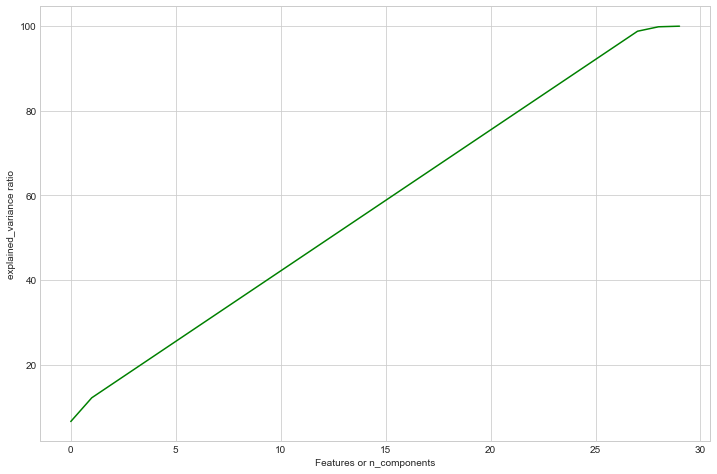

In [66]:
# plot cummulative variance of PCA()
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100,color='green')
plt.xlabel("Features or n_components")
plt.ylabel("explained_variance ratio")


### Observation:

- We require greater than or equal 25 features for getting 95% experience variance ratio

### Visualization of t-sne (t-distributed stochastic neighbor embedding):

In [76]:
# we are ploting the t-sne
# but t-sne take more time on full data set
# so  we are taking 20K data points

X_Scaled_Fraud = X_scaled[y == 1]
X_Scaled_NonFraud = X_scaled[y == 0]

total_sample_size = 20000 # we are  taking 20000 data points

#non-fraud sample calculation
NonFraud_sample_size = total_sample_size - len(X_Scaled_Fraud)

# create the final sample for fraund and non-fraud transaction.
NonFraud_sample = np.random.choice(len(X_Scaled_NonFraud),size = NonFraud_sample_size,replace= False)

# X_sample for dataset for fraud and non fraud 
X_sample = np.concatenate([X_Scaled_Fraud,X_Scaled_NonFraud[NonFraud_sample]])

# fraud transaction are in the starting
Y_sample = np.zeros((total_sample_size), dtype=np.int)
Y_sample[:len(X_Scaled_Fraud)] = 1











In [75]:
print("sample shape:",X_sample.shape)
print("Fraud tranasaction in sample:",y_sample.sum())


sample shape: (20000, 30)
Fraud tranasaction in sample: 492


In [77]:
colors = {0: 'blue', 1: 'darkred'}

In [80]:
from sklearn.manifold import TSNE

def tsne_plot(perplexity=30,n_iter=1000,verbose=0):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, verbose=verbose).fit_transform(X_sample)
    tsne_df = pd.DataFrame(data={'Dim1': tsne[:, 0], 'Dim2': tsne[:, 1], 'label': y_sample})
    sns.FacetGrid(tsne_df, hue="label", size=8, palette=colors).map(plt.scatter, "Dim1", "Dim2", alpha=0.4).add_legend()
    plt.title(f'X_sample - Perplexity = {perplexity}, n_iter = {n_iter}')
    

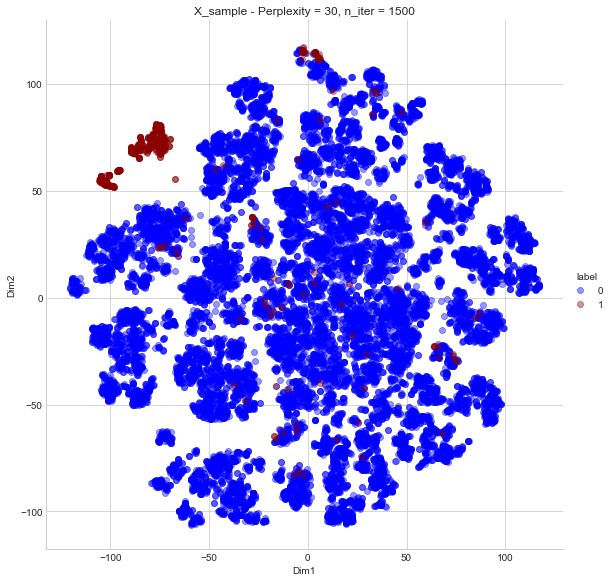

In [81]:
tsne_plot(perplexity=30, n_iter=1500)

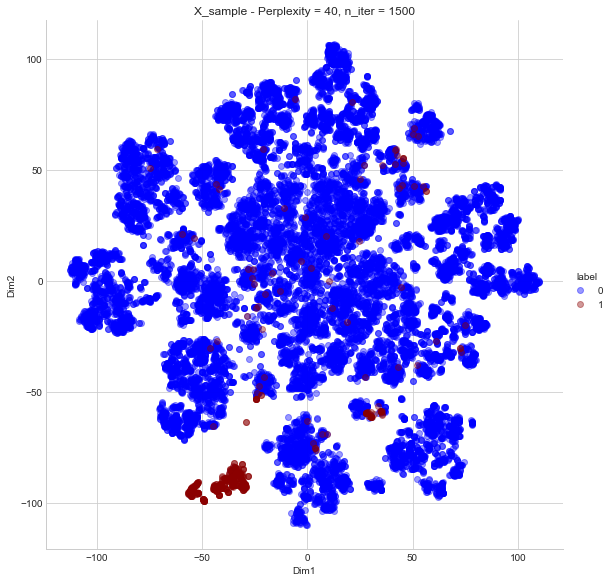

In [82]:
tsne_plot(perplexity=40, n_iter=1500)

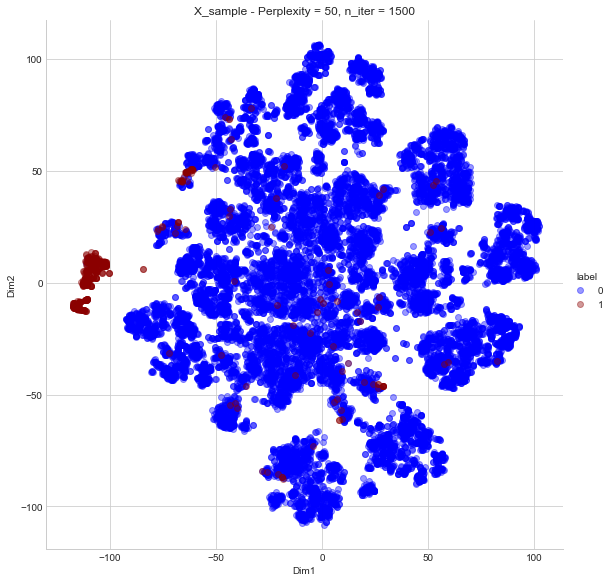

In [83]:
tsne_plot(perplexity=50, n_iter=1500)

#### Observation:
- Most of fraud transaction data are well separated from non- fraud transaction data

